### CASE STUDY: Breast Cancer classification 

#### General Introduction

According to research, the most experienced physician can identify the breast cancer with 79 percent accuracy, whereas the machine learning models have 91 - 97 percent accuracy. Machine Learning models use the features from cell images. 

![process](images/process.png)


#### Porblem Statement 

Predicting if the cancer diagnosis is begnin or malignant base on following features.

- radius (mean of distance from center to points on the perimeter)
- texture (standard deviation of gray-scale values) 
- perimeter 
- area
- smoothness (local variation in radius length)
- compactness ( perimeter^2/area - 1.0 )
- concavity (severity of concave portion of the contour)
- concave points (number of cancave portions of the contour)
- symetry 
- fractal dimension (coastline approximation -1)

Linearly Separable dataset using 30 features.

#instance: 5669

class distribution: 212 Malignant, 357 Benign

Target class: Malignant, Benign 




Importing library and dataset

In [136]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [137]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [138]:
data = load_breast_cancer()

In [139]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [140]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [141]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [142]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [143]:
print(f"Shape: {data.data.shape}")

Shape: (569, 30)


In [144]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [145]:
df = pd.DataFrame(data=np.c_[data.data, data.target], columns=np.append(data.feature_names, ['target']))
df.sample(10)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
49         13.49         22.30           86.91      561.0          0.08752   
113        10.51         20.19           68.64      334.2          0.11220   
60         10.17         14.88           64.55      311.9          0.11340   
133        15.71         13.93          102.00      761.7          0.09462   
280        19.16         26.60          126.20     1138.0          0.10200   
304        11.46         18.16           73.59      403.1          0.08853   
536        14.27         22.55           93.77      629.8          0.10380   
339        23.51         24.27          155.10     1747.0          0.10690   
94         15.06         19.83          100.30      705.6          0.10390   
54         15.10         22.02           97.26      712.8          0.09056   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
49            0.07698         0.04751              0.03384         0.1809   
113           0.13030         0.06476              0.03068         0.1922   
60            0.08061         0.01084              0.01290         0.2743   
133           0.09462         0.07135              0.05933         0.1816   
280           0.14530         0.19210              0.09664         0.1902   
304           0.07694         0.03344              0.01502         0.1411   
536           0.11540         0.14630              0.06139         0.1926   
339           0.12830         0.23080              0.14100         0.1797   
94            0.15530         0.17000              0.08815         0.1855   
54            0.07081         0.05253              0.03334         0.1616   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
49                  0.05718  ...          31.82            99.00       698.8   
113                 0.07782  ...          22.75            72.62       374.4   
60                  0.06960  ...          17.45            69.86       368.6   
133                 0.05723  ...          19.25           114.30       922.8   
280                 0.06220  ...          35.90           159.80      1724.0   
304                 0.06243  ...          21.61            82.69       489.8   
536                 0.05982  ...          34.27           104.30       728.3   
339                 0.05506  ...          30.73           202.40      2906.0   
94                  0.06284  ...          24.23           123.50      1025.0   
54                  0.05684  ...          31.69           117.70      1030.0   

     worst smoothness  worst compactness  worst concavity  \
49             0.1162            0.17110          0.22820   
113            0.1300            0.20490          0.12950   
60             0.1275            0.09866          0.02168   
133            0.1223            0.19490          0.17090   
280            0.1782            0.38410          0.57540   
304            0.1144            0.17890          0.12260   
536            0.1380            0.27330          0.42340   
339            0.1515            0.26780          0.48190   
94             0.1551            0.42030          0.52030   
54             0.1389            0.20570          0.27120   

     worst concave points  worst symmetry  worst fractal dimension  target  
49                0.12820          0.2871                  0.06917     1.0  
113               0.06136          0.2383                  0.09026     1.0  
60                0.02579          0.3557                  0.08020     1.0  
133               0.13740          0.2723                  0.07071     1.0  
280               0.18720          0.3258                  0.09720     0.0  
304               0.05509          0.2208                  0.07638     1.0  
536               0.13620          0.2698                  0.08351     0.0  
339               0.20890          0.2593                  0.07738     0.0  
94                0.21150          0.2834           

#### Data Visualization

<AxesSubplot: xlabel='target', ylabel='count'>

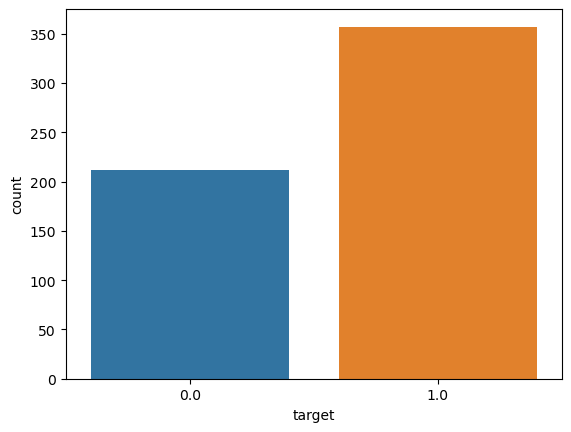

In [146]:
sns.countplot(x=df.target)

In [147]:
df.target.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

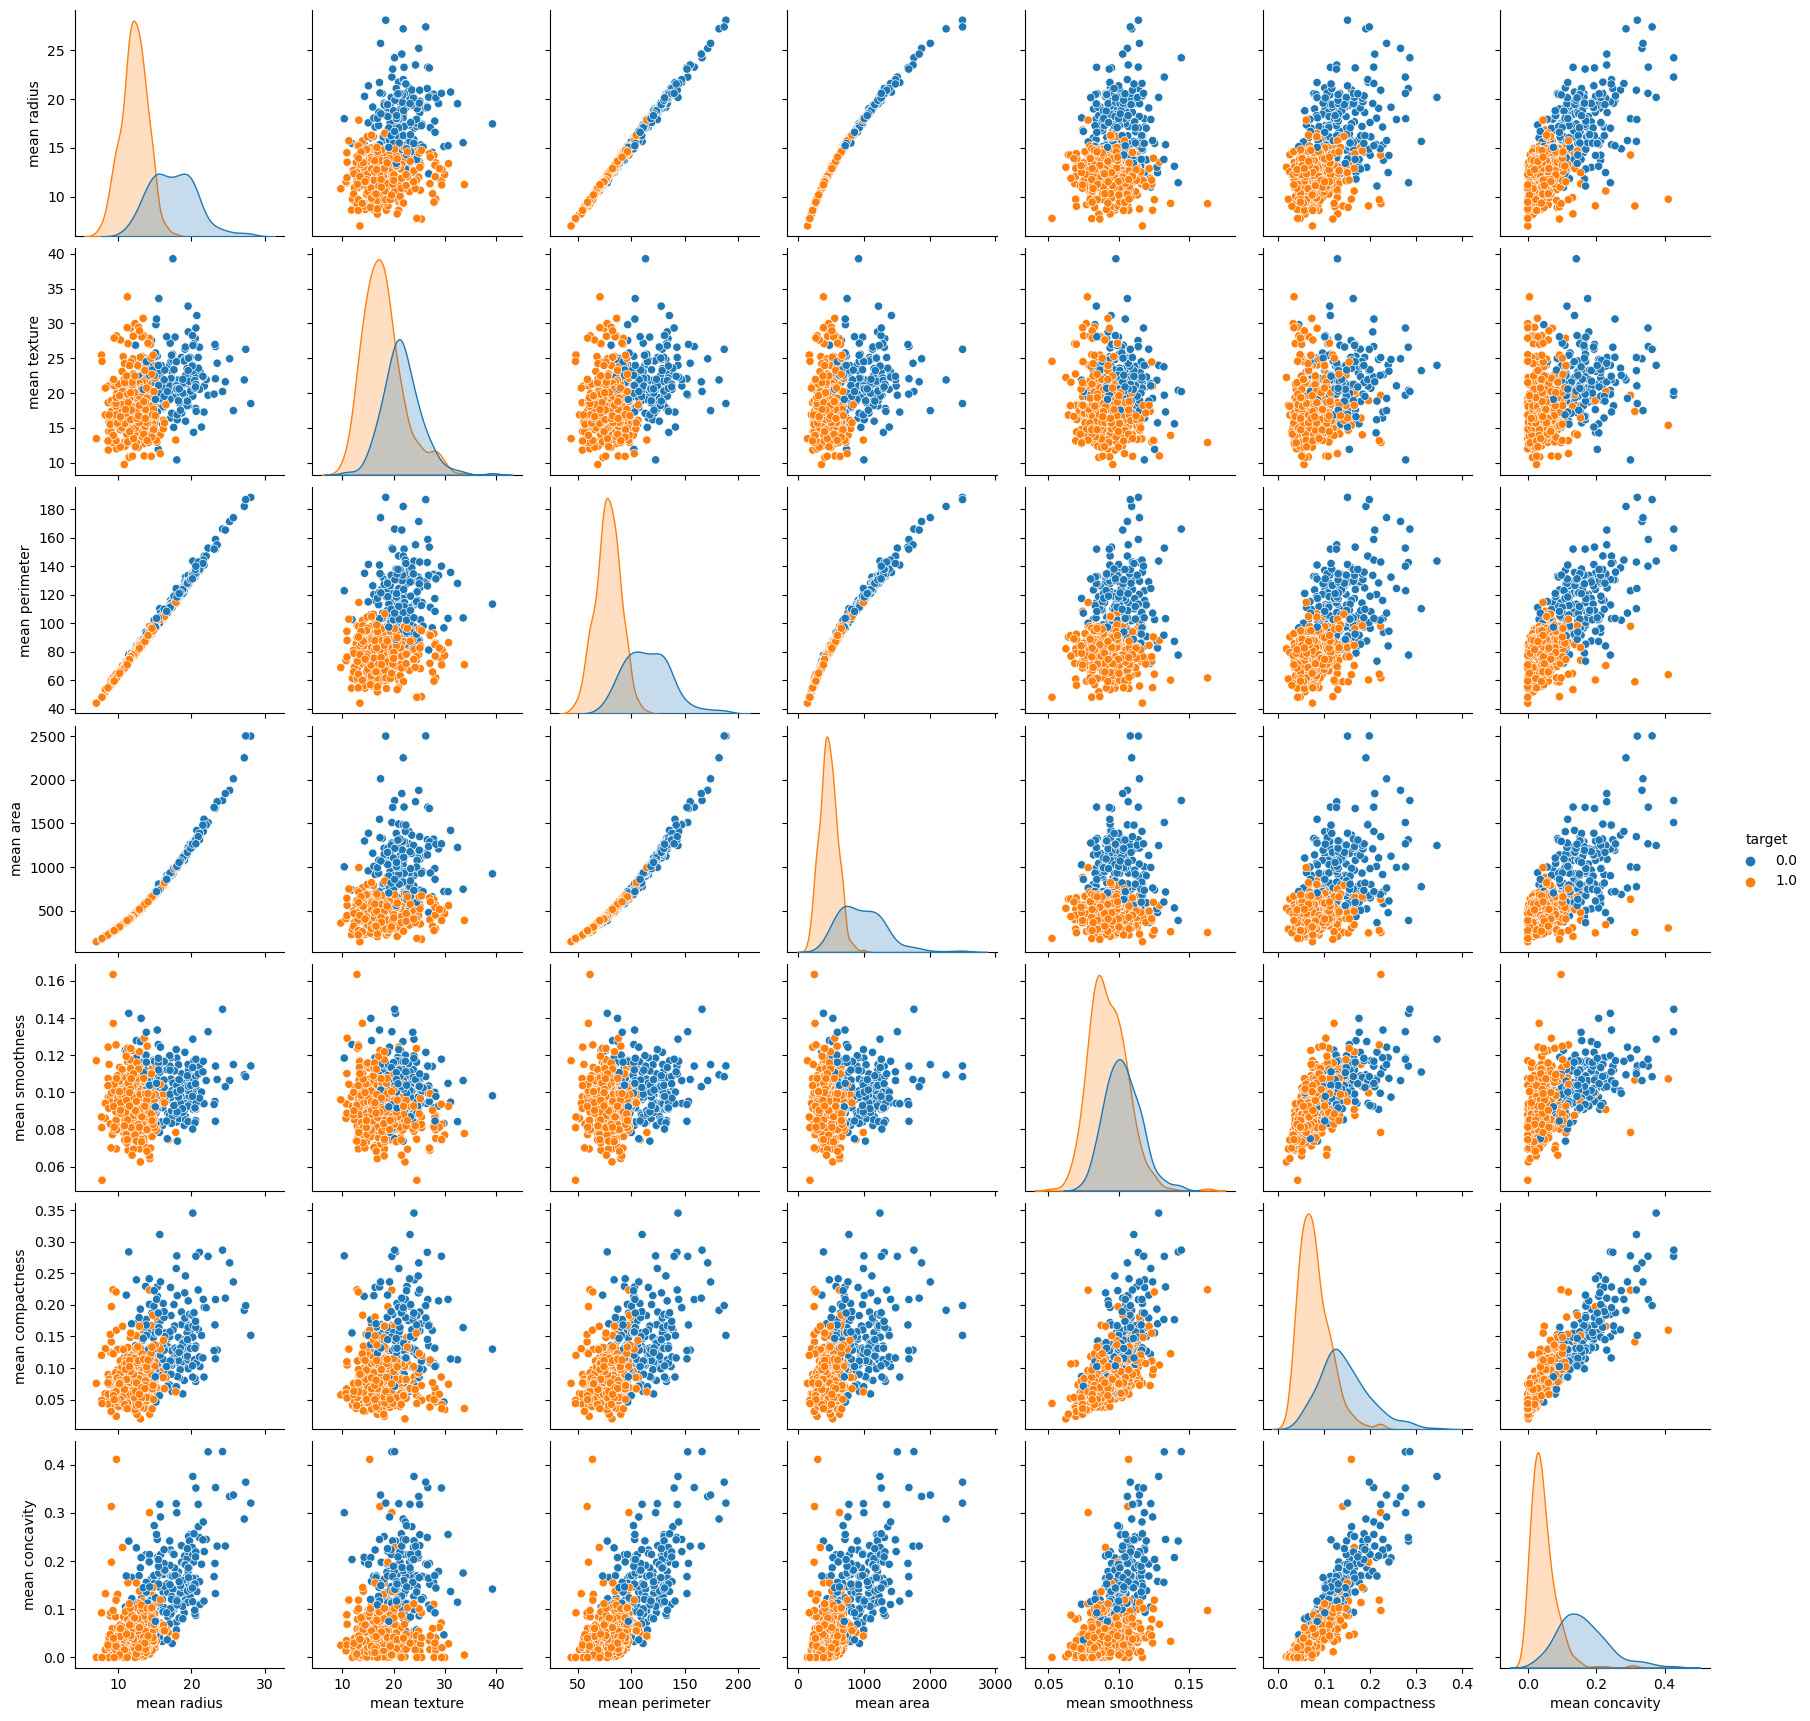

In [148]:
sns.pairplot(df, vars=df.columns[0:7], hue='target')

<AxesSubplot: xlabel='mean area', ylabel='mean smoothness'>

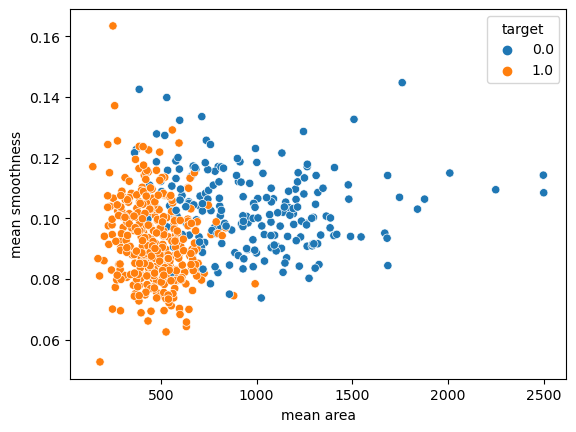

In [149]:
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df)

<AxesSubplot: >

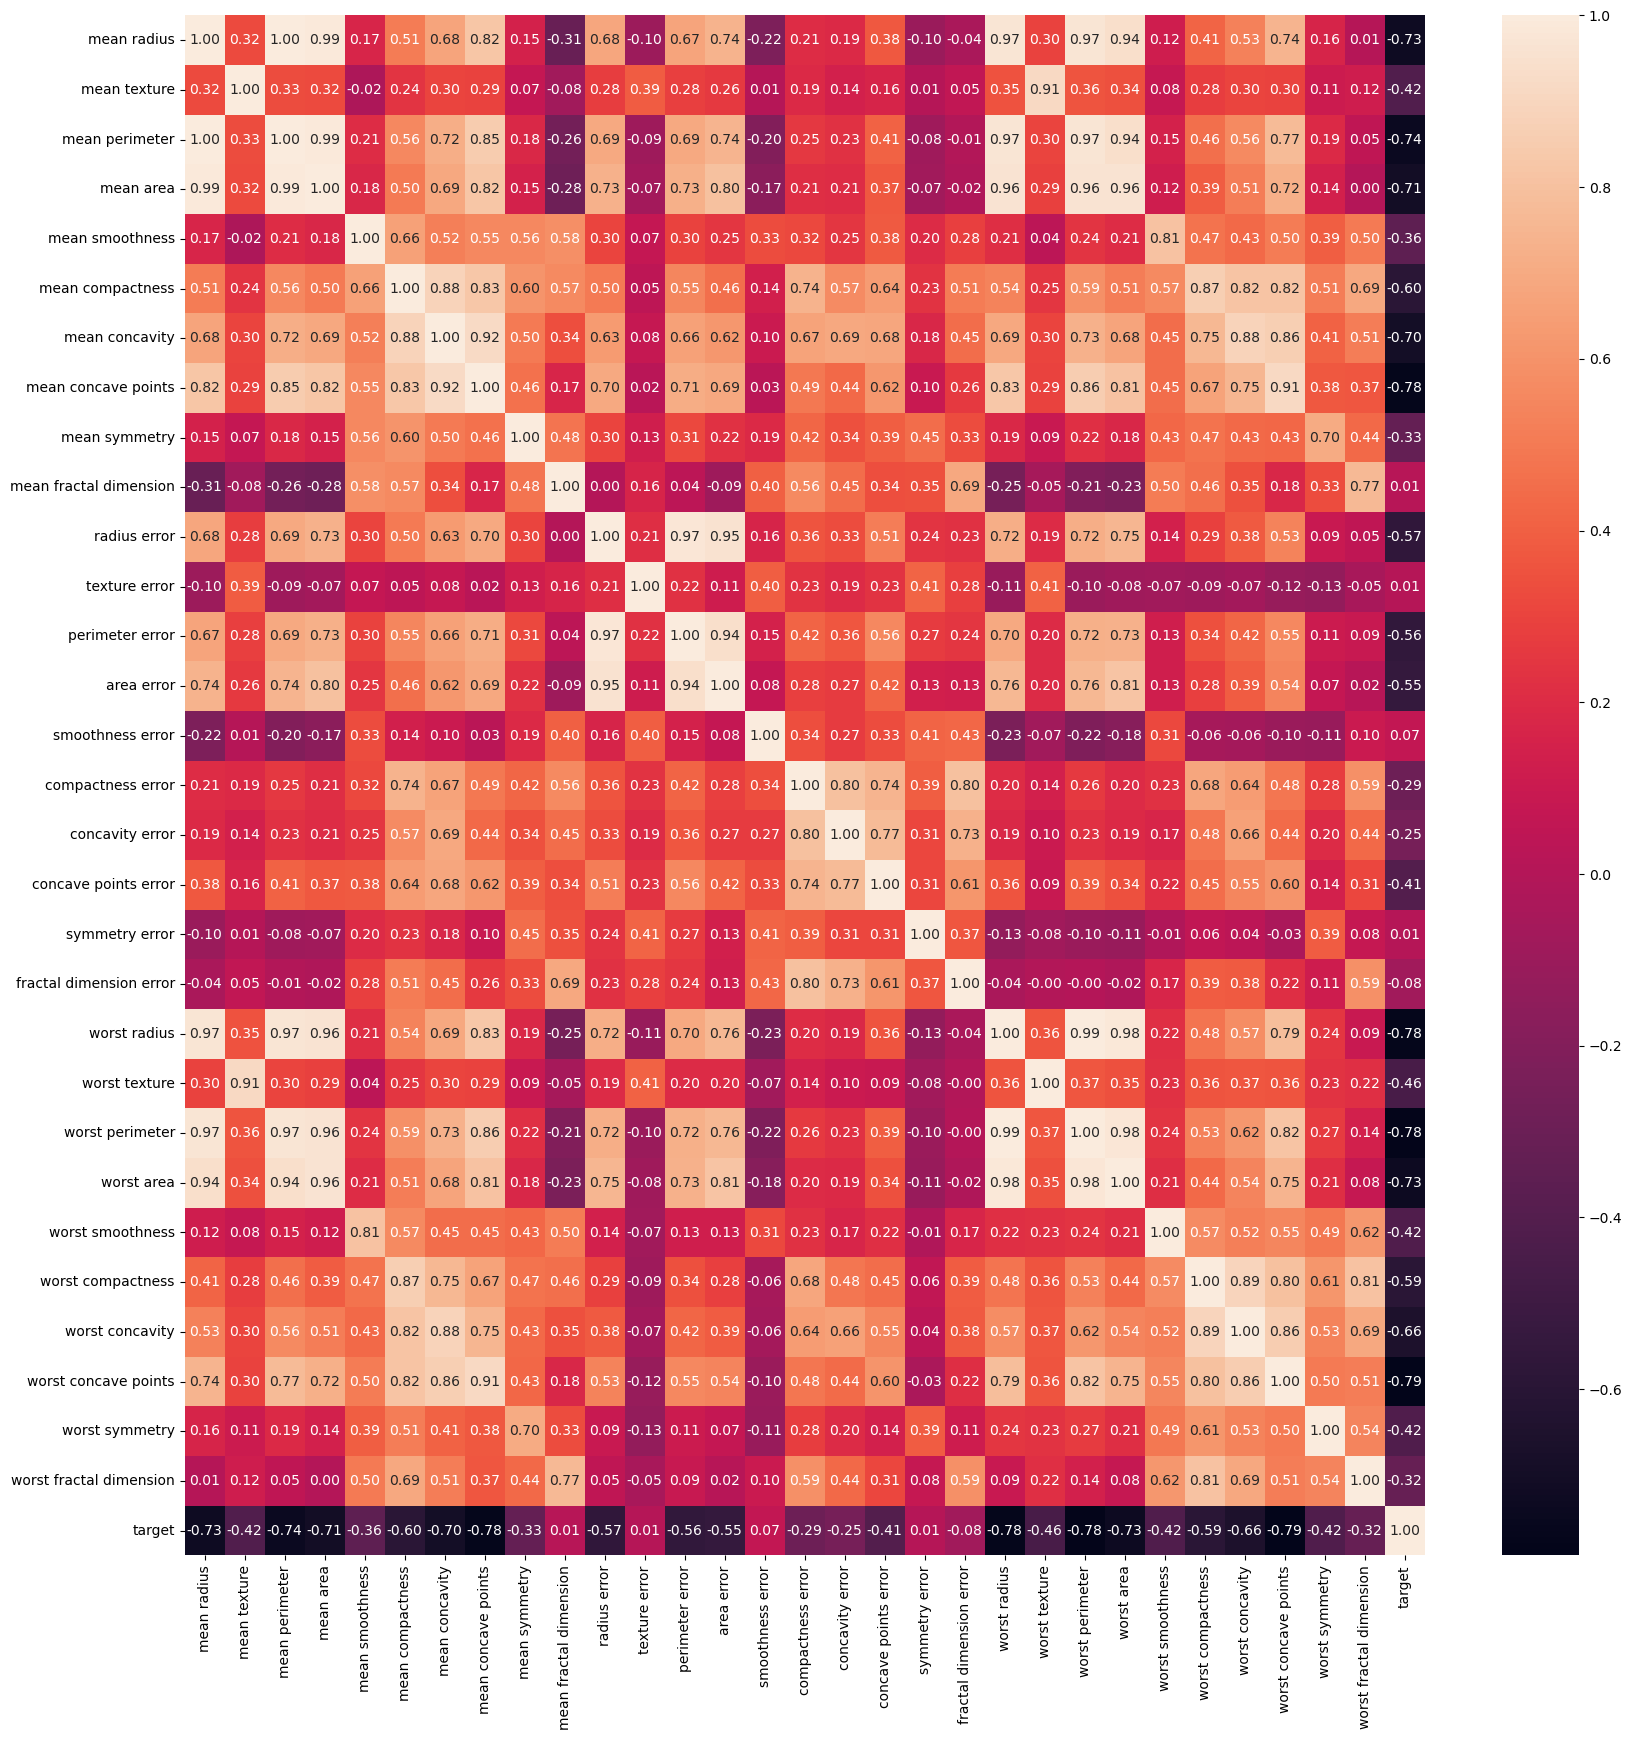

In [150]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

#### Model Developement 

In [151]:
X_data = df.iloc[:,:-1].values
y_data = df.iloc[:, -1].values

Split the database

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=5)

In [153]:
X_train

array([[1.320e+01, 1.582e+01, 8.407e+01, ..., 2.500e-02, 2.651e-01,
        8.385e-02],
       [1.136e+01, 1.757e+01, 7.249e+01, ..., 8.698e-02, 2.973e-01,
        7.745e-02],
       [1.808e+01, 2.184e+01, 1.174e+02, ..., 9.181e-02, 2.369e-01,
        6.558e-02],
       ...,
       [1.791e+01, 2.102e+01, 1.244e+02, ..., 1.964e-01, 3.245e-01,
        1.198e-01],
       [1.578e+01, 2.291e+01, 1.057e+02, ..., 2.034e-01, 3.274e-01,
        1.252e-01],
       [9.876e+00, 1.727e+01, 6.292e+01, ..., 5.588e-02, 2.989e-01,
        7.380e-02]])

In [154]:
y_train

array([1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0.

#### Optimization -Feature scaling 

There are several types of data scalers available in scikit-learn that you can use to preprocess your data. Here are some of the most commonly used ones:

1. StandardScaler: This scaler standardizes features by subtracting the mean and dividing by the standard deviation. It assumes that the distribution of the data is Gaussian or Gaussian-like.

2. MinMaxScaler: This scaler scales the data to a fixed range between 0 and 1. It is useful for models that require data to be normalized to a fixed range.

3. MaxAbsScaler: This scaler scales the data so that the absolute maximum value of each feature is 1. It is useful for sparse data and for models that require data to be centered at zero.

4. RobustScaler: This scaler scales the data using the median and the interquartile range (IQR). It is robust to outliers in the data.

5. QuantileTransformer: This scaler transforms the data to follow a uniform or normal distribution. It is useful for non-linear models that require uniformly distributed data.

6. PowerTransformer: This scaler applies a power transformation to make the data more Gaussian-like. It is useful for models that assume normally distributed data.


In [155]:
# Feature scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train);
X_test = scaler.fit_transform(X_test);

Model Development

In [156]:
def models(X_train, y_train):
    #logistc regression model
    logisticR = LogisticRegression()
    logisticR.fit(X_train, y_train)
    
    # Decision Tree
    Dtree = DecisionTreeClassifier()
    Dtree.fit(X_train, y_train)
    
    #Random forest
    RandomF = RandomForestClassifier()
    RandomF.fit(X_train, y_train)
    
    #support vector machine 
    SVClassifier = SVC()
    SVClassifier.fit(X_train, y_train)
    
    # accouracy
    print(f" LR training accuracy: {logisticR.score(X_train, y_train)}")
    print(f" DT training accuracy: {Dtree.score(X_train, y_train)}")
    print(f" RF training accuracy: {RandomF.score(X_train, y_train)}")
    print(f" SVM training accuracy: {SVClassifier.score(X_train, y_train)}")
    
    return logisticR, Dtree, RandomF, SVClassifier

In [157]:
LogR, DTree, RForest, SVClassifier = models(X_train, y_train)

 LR training accuracy: 0.9912087912087912
 DT training accuracy: 1.0
 RF training accuracy: 1.0
 SVM training accuracy: 0.989010989010989


In [158]:
LR_Pred = LogR.predict(X_test)
DT_pred = DTree.predict(X_test)
RF_pred = RForest.predict(X_test)
SVC_Pred = SVClassifier.predict(X_test)

In [159]:
def plot_cm(predictions, y_test, label):
    for idx , predicted in enumerate(predictions):
        cm = confusion_matrix(y_test, predicted);
        sns.heatmap(cm, annot=True)
        plt.title(f'{label[idx]} Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')

        # Show the plot
        plt.show()

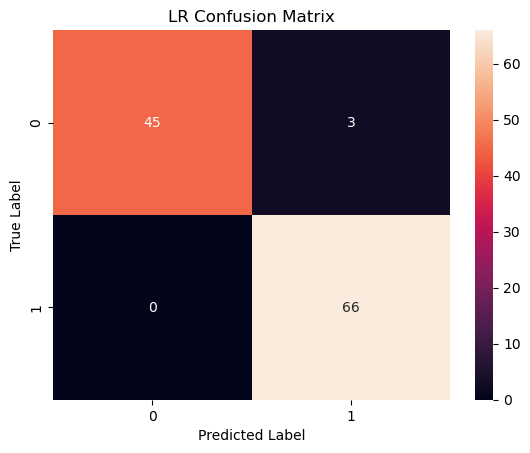

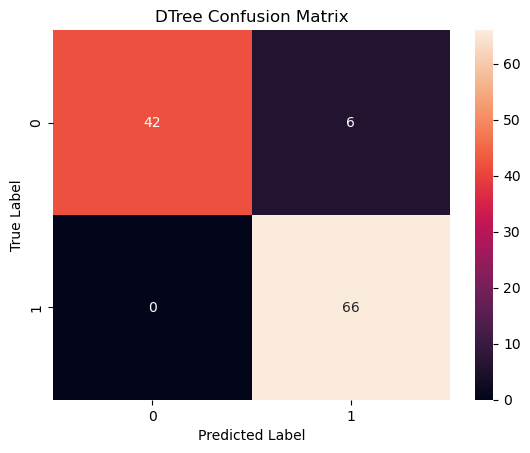

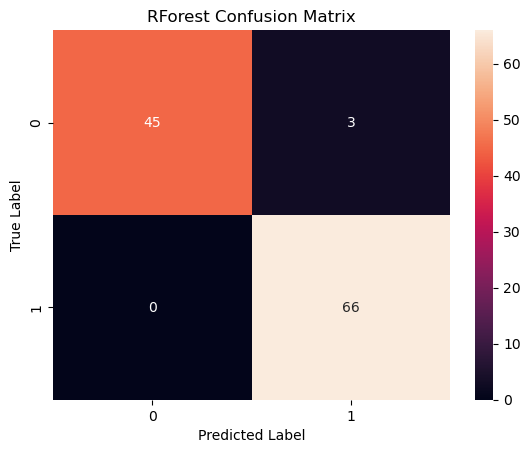

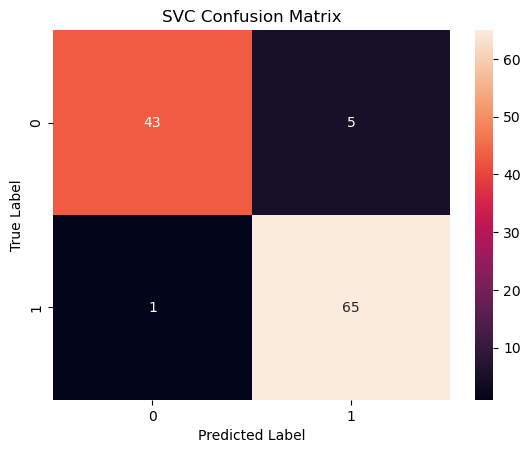

In [160]:
plot_cm([LR_Pred, DT_pred, RF_pred, SVC_Pred], y_test, ['LR', 'DTree', 'RForest', 'SVC'])

In [161]:
def model_metrices(predictions, y_test, labels):
    for idx, predicted in enumerate(predictions):
        print('Model :',labels[idx])
        print(classification_report(y_test,predicted))
        print(accuracy_score(y_test,predicted))

In [162]:
model_metrices([LR_Pred, DT_pred, RF_pred, SVC_Pred], y_test, ['LR', 'DTree', 'RForest', 'SVC'])

Model : LR
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

0.9736842105263158
Model : DTree
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93        48
         1.0       0.92      1.00      0.96        66

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

0.9473684210526315
Model : RForest
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97      